In [1]:
# Importing the necessary Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Reading the Data
filepath = "University Data.csv"
clg_data = pd.read_csv(filepath)
# clg_data.drop(columns=["Private"])
clg_data=clg_data.rename(columns={'Unnamed: 0':'University_Name'})
clg_data

modified_data = clg_data.copy()
modified_data = modified_data.drop(columns=['University_Name', 'Private'])
modified_data

,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
1,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
2,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
3,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
4,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
772,2197,1515,543,4,26,3089,2029,6797,3900,500,1200,60,60,21.0,14,4469,40
773,1959,1805,695,24,47,2849,1107,11520,4960,600,1250,73,75,13.3,31,9189,83
774,2097,1915,695,34,61,2793,166,6900,4200,617,781,67,75,14.4,20,8323,49
775,10705,2453,1317,95,99,5217,83,19840,6510,630,2115,96,96,5.8,49,40386,99


### Checking for Missing Values

In [3]:
clg_data.isnull().sum()

University_Name    0
Private            0
Apps               0
Accept             0
Enroll             0
Top10perc          0
Top25perc          0
F.Undergrad        0
P.Undergrad        0
Outstate           0
Room.Board         0
Books              0
Personal           0
PhD                0
Terminal           0
S.F.Ratio          0
perc.alumni        0
Expend             0
Grad.Rate          0
dtype: int64

<span style="color: cyan;">From here we can infer that there is no column with NULL values</span>

In [4]:
clg_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 777 entries, 0 to 776
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   University_Name  777 non-null    object 
 1   Private          777 non-null    object 
 2   Apps             777 non-null    int64  
 3   Accept           777 non-null    int64  
 4   Enroll           777 non-null    int64  
 5   Top10perc        777 non-null    int64  
 6   Top25perc        777 non-null    int64  
 7   F.Undergrad      777 non-null    int64  
 8   P.Undergrad      777 non-null    int64  
 9   Outstate         777 non-null    int64  
 10  Room.Board       777 non-null    int64  
 11  Books            777 non-null    int64  
 12  Personal         777 non-null    int64  
 13  PhD              777 non-null    int64  
 14  Terminal         777 non-null    int64  
 15  S.F.Ratio        777 non-null    float64
 16  perc.alumni      777 non-null    int64  
 17  Expend          

<span style="color: cyan;">Here we can get info abt the data-type of each data column and if any values are NULL in our dataframe (object data-type is strings here)</span>

In [5]:
# Description of Data

round(clg_data.describe(), 2)

,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
count,777.00,777.00,777.00,777.00,777.0,777.00,777.00,777.00,777.00,777.00,777.00,777.00,777.00,777.00,777.00,777.00,777.00
mean,3001.64,2018.80,779.97,27.56,55.8,3699.91,855.30,10440.67,4357.53,549.38,1340.64,72.66,79.70,14.09,22.74,9660.17,65.46
std,3870.20,2451.11,929.18,17.64,19.8,4850.42,1522.43,4023.02,1096.70,165.11,677.07,16.33,14.72,3.96,12.39,5221.77,17.18
min,81.00,72.00,35.00,1.00,9.0,139.00,1.00,2340.00,1780.00,96.00,250.00,8.00,24.00,2.50,0.00,3186.00,10.00
25%,776.00,604.00,242.00,15.00,41.0,992.00,95.00,7320.00,3597.00,470.00,850.00,62.00,71.00,11.50,13.00,6751.00,53.00
50%,1558.00,1110.00,434.00,23.00,54.0,1707.00,353.00,9990.00,4200.00,500.00,1200.00,75.00,82.00,13.60,21.00,8377.00,65.00
75%,3624.00,2424.00,902.00,35.00,69.0,4005.00,967.00,12925.00,5050.00,600.00,1700.00,85.00,92.00,16.50,31.00,10830.00,78.00
max,48094.00,26330.00,6392.00,96.00,100.0,31643.00,21836.00,21700.00,8124.00,2340.00,6800.00,103.00,100.00,39.80,64.00,56233.00,118.00



<span style='color:cyan'> Information about various parameters </span>

Apps: Number of applications received.

Accept: Number of applications accepted.

Enroll: Number of new students enrolled.

Top10perc: Pct. new students from top 10% of H.S. class.

Top25perc: Pct. new students from top 25% of HS class
F.Undergrad: Number of full-time undergraduates.

P.Undergrad: Number of part-time undergraduates.

Outstate: Out-of-state tuition.

Room.Board: Room and board costs.

Books: Estimated book costs.

Personal: Estimated personal spending.

PhD: Pct. of faculty with Ph.D.’s.

Terminal: Pct. of faculty with terminal degree.

S.F.Ratio: Student/faculty ratio.

perc.alumni: Pct. alumni who donate.

Expend: Instructional expenditure per student.

Grad.Rate: Graduation rate.




array([[<Axes: title={'center': 'Apps'}>,
        <Axes: title={'center': 'Accept'}>,
        <Axes: title={'center': 'Enroll'}>,
        <Axes: title={'center': 'Top10perc'}>],
       [<Axes: title={'center': 'Top25perc'}>,
        <Axes: title={'center': 'F.Undergrad'}>,
        <Axes: title={'center': 'P.Undergrad'}>,
        <Axes: title={'center': 'Outstate'}>],
       [<Axes: title={'center': 'Room.Board'}>,
        <Axes: title={'center': 'Books'}>,
        <Axes: title={'center': 'Personal'}>,
        <Axes: title={'center': 'PhD'}>],
       [<Axes: title={'center': 'Terminal'}>,
        <Axes: title={'center': 'S.F.Ratio'}>,
        <Axes: title={'center': 'perc.alumni'}>,
        <Axes: title={'center': 'Expend'}>],
       [<Axes: title={'center': 'Grad.Rate'}>, <Axes: >, <Axes: >,
        <Axes: >]], dtype=object)

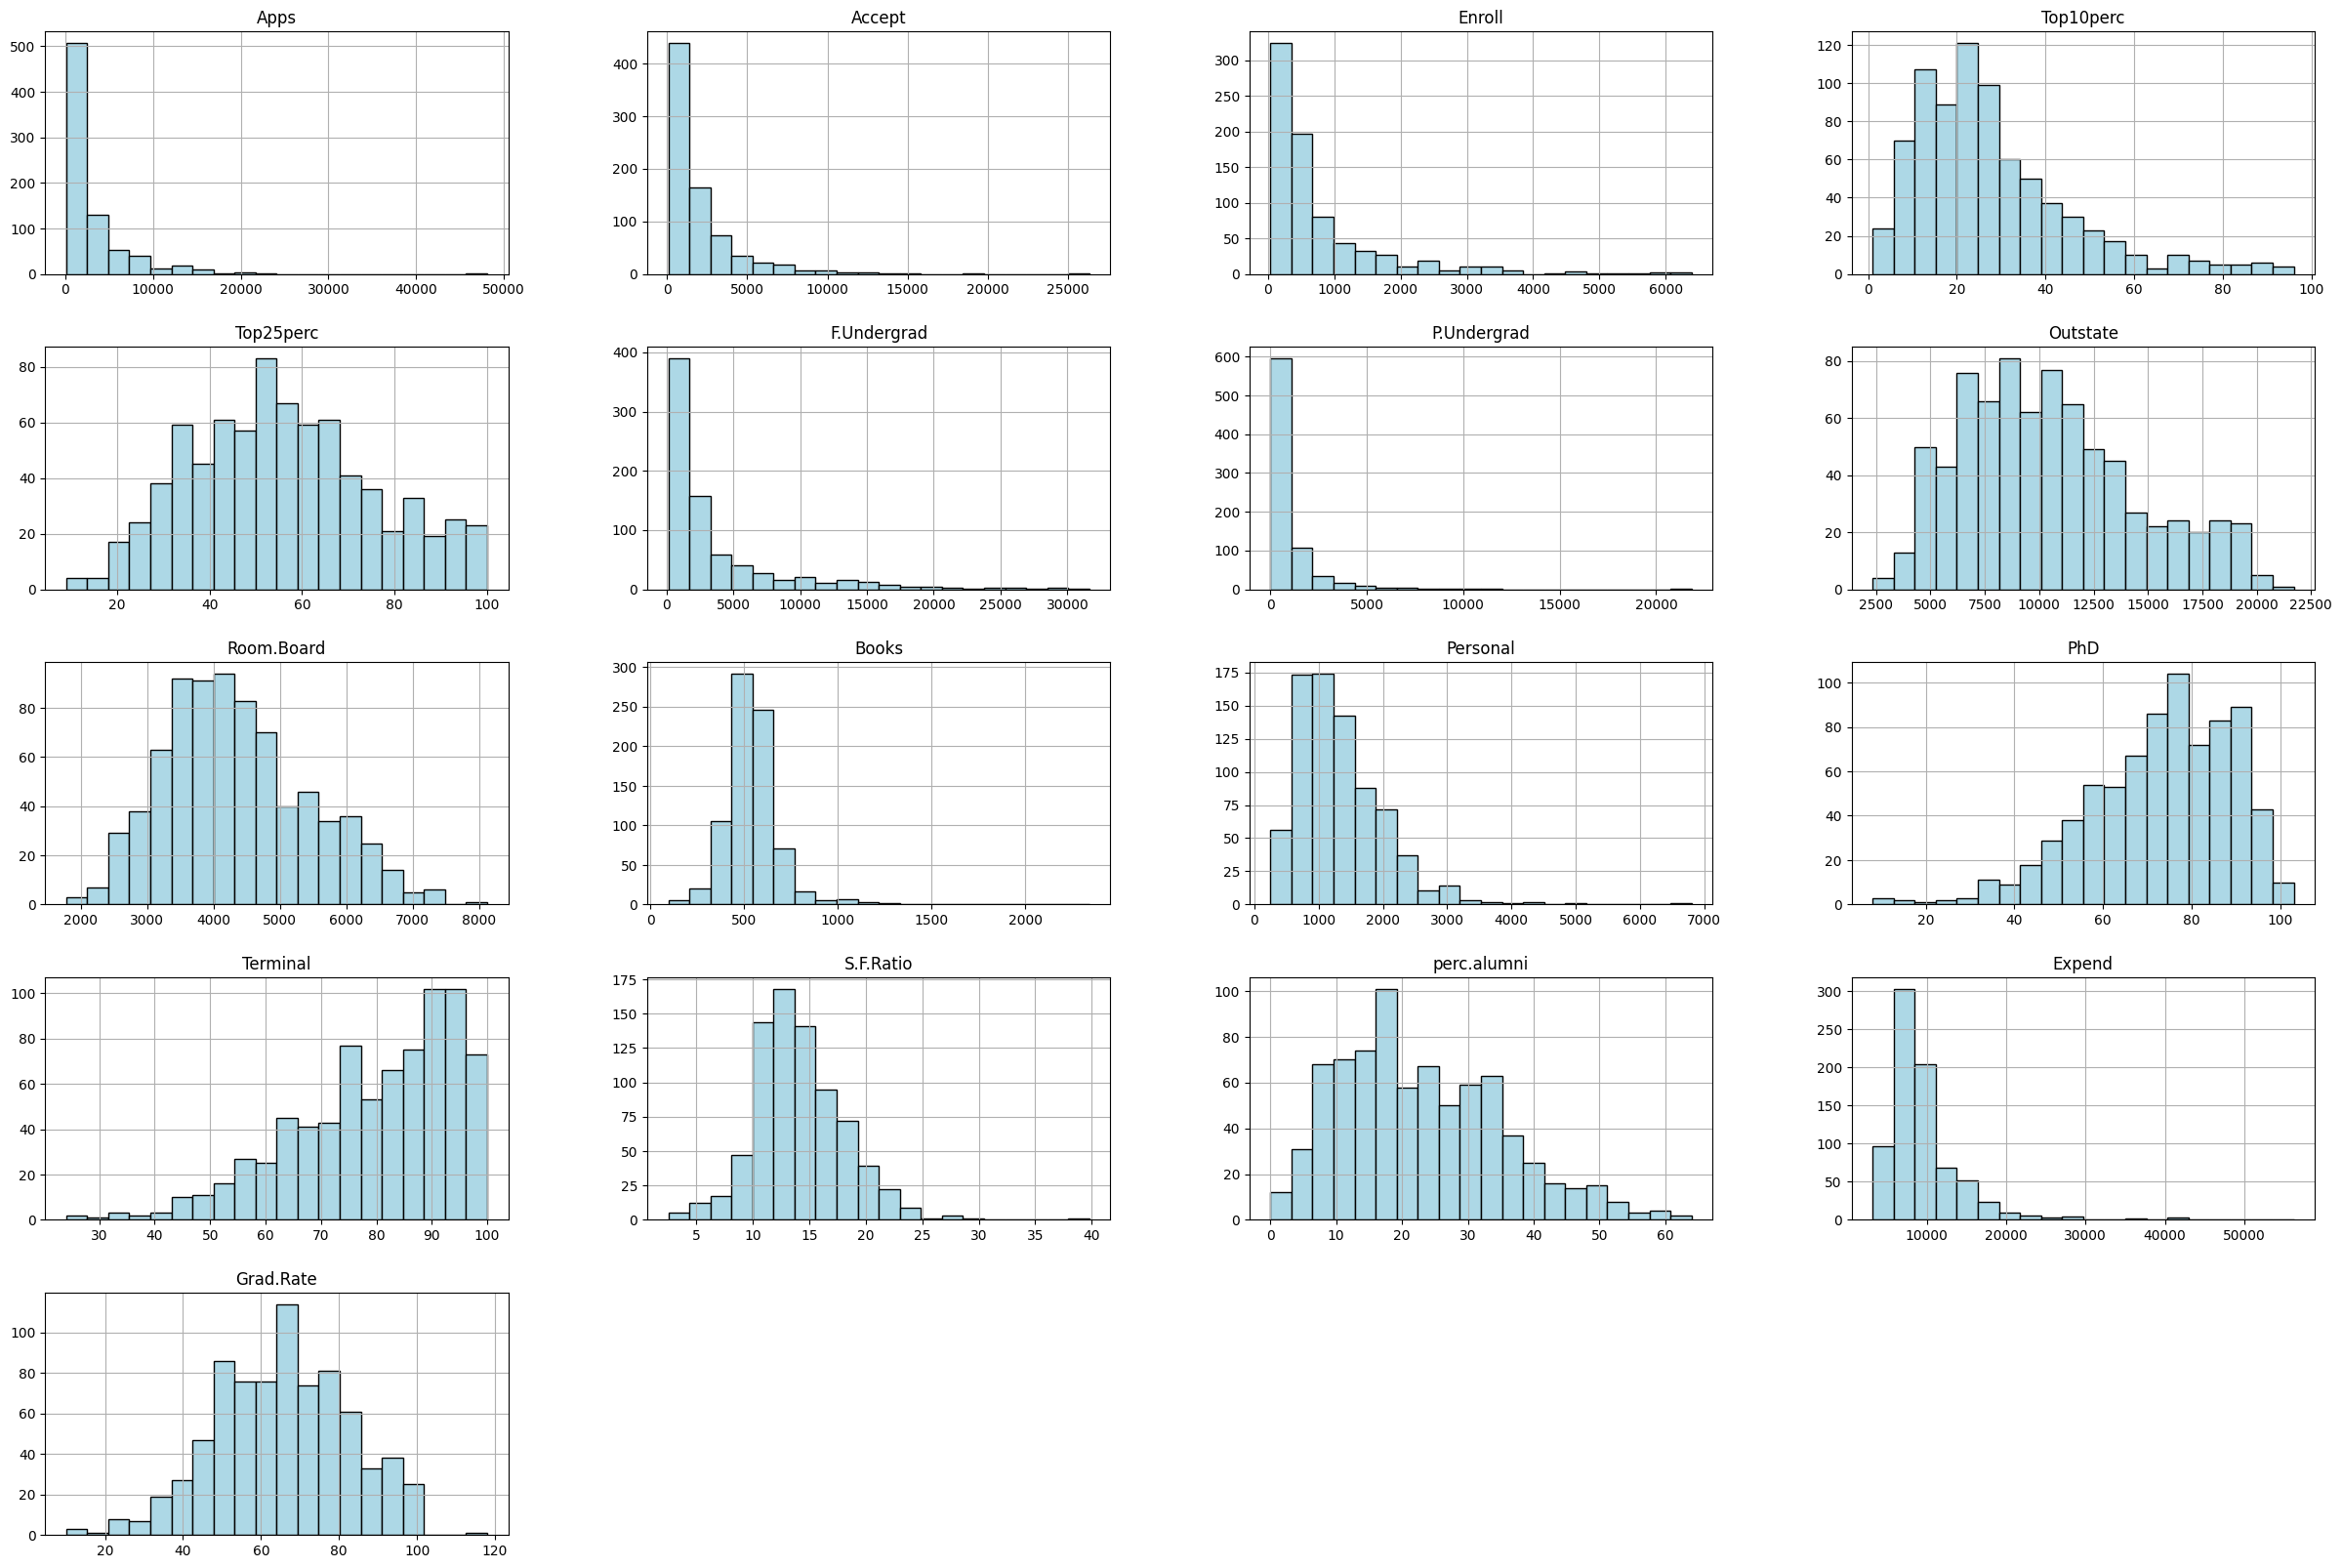

In [6]:
clg_data.hist(figsize=(30,20),bins=20, color='lightblue', edgecolor='black')


<span style="color: cyan"> Here we see the Histograms of each parameter</span>

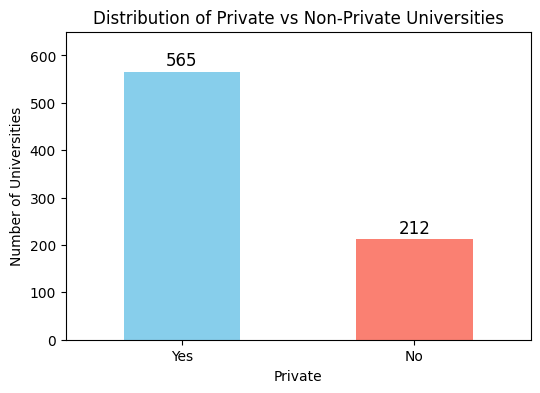

In [7]:
# Plotting a histogram for the "Private" column

private_counts = clg_data['Private'].value_counts()

plt.figure(figsize=(6,4))
bars = private_counts.plot(kind='bar', color=['skyblue', 'salmon'])

for column in bars.patches:
    bars.annotate(format(column.get_height(), '.0f'), (column.get_x() + column.get_width() / 2, column.get_height()), ha='center', va='center', size=12, xytext=(0, 8), textcoords='offset points')

plt.title('Distribution of Private vs Non-Private Universities')
plt.xlabel('Private')
plt.ylabel('Number of Universities')
plt.ylim(top=650)
plt.xticks(rotation=0)
plt.show()

<span style="color: cyan"> From Histogram we can see that there are 2 Outliers in our dataset

    (i)  graduation Rate > 100

    (ii) %faculty with PhD > 100

</span>

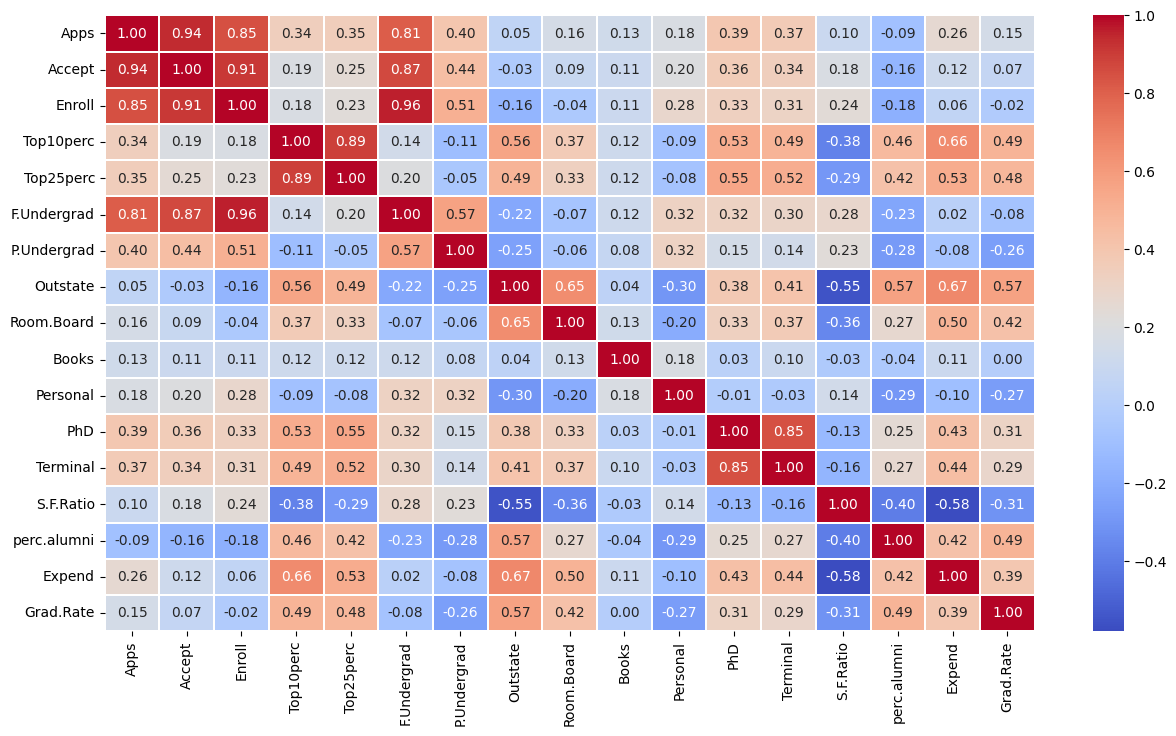

In [8]:
# Calculating the correlation matrix and plotting it using the heatmap

plt.figure(figsize=(15,8))
corr = modified_data.corr()
hm1 = sns.heatmap(round(corr,2), annot=True, cmap="coolwarm", fmt='.2f', linewidths=.05)
# print(round(corr,2))
plt.show()

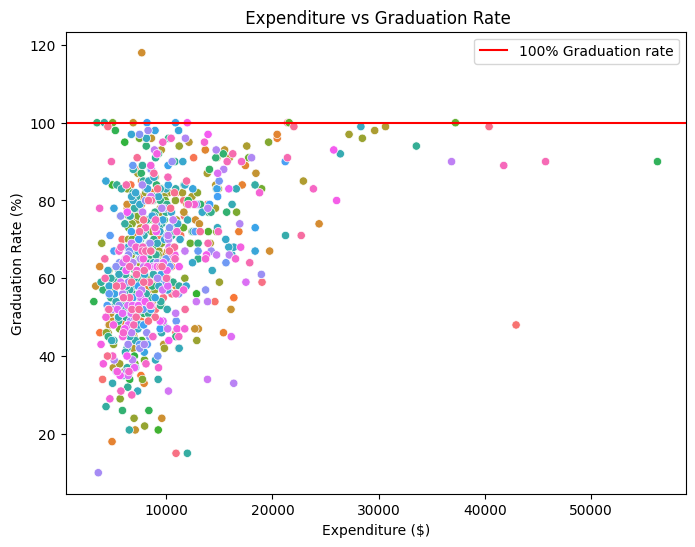

In [9]:
# Visualize that the Graduation rate of some university is >100

plt.figure(figsize=(8,6))
sns.scatterplot(data=clg_data, x='Expend', y='Grad.Rate', hue='University_Name',legend=None)
# x,y = [0,60000], [100,100]
# sns.lineplot(x=x, y=y)
plt.axhline(y=100, c='r', label="100% Graduation rate", linewidth = 1.5)
plt.title(' Expenditure vs Graduation Rate')
plt.xlabel('Expenditure ($)')
plt.ylabel('Graduation Rate (%)')
plt.legend()
plt.show()

In [10]:
# Finding the University with Graduation rate > 100

clg_data[clg_data['Grad.Rate']>100]


,University_Name,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
95,Cazenovia College,Yes,3847,3433,527,9,35,1010,12,9384,4840,600,500,22,47,14.3,20,7697,118


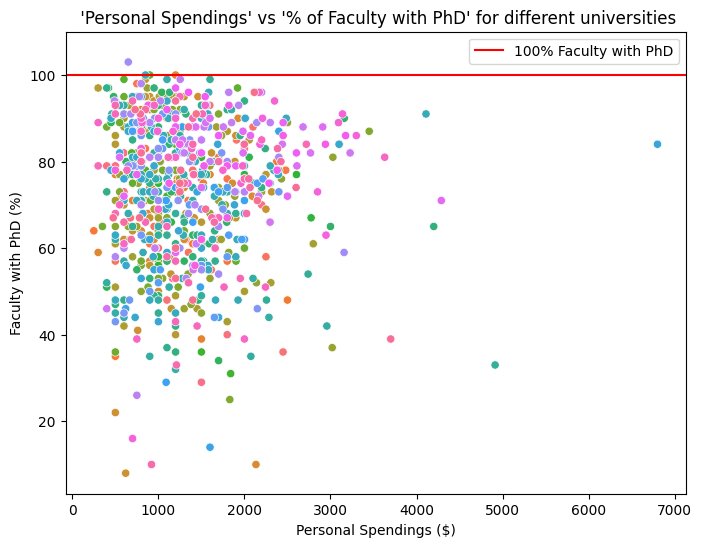

In [11]:
# Visualize that the %Faculty with PhD of some university is >100

plt.figure(figsize=(8,6))
sns.scatterplot(data=clg_data, x='Personal', y='PhD', hue='University_Name', legend=None)
plt.axhline(y=100, c='r', label="100% Faculty with PhD", linewidth = 1.5)
plt.title(" 'Personal Spendings' vs '% of Faculty with PhD' for different universities")
plt.xlabel('Personal Spendings ($)')
plt.ylabel('Faculty with PhD (%)')
plt.ylim(top=110)
plt.legend()
plt.show()

In [12]:
# Finding the University where % of Faculty with PhD > 100

clg_data[clg_data['PhD']>100]

,University_Name,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
582,Texas A&M University at Galveston,No,529,481,243,22,47,1206,134,4860,3122,600,650,103,88,17.4,16,6415,43


In [13]:
# modified_data.loc[modified_data['Grad.Rate']>100, "Grad.Rate"] = 100
# modified_data.loc[modified_data['PhD']>100, 'PhD'] = 100

In [14]:
print(modified_data[modified_data['Grad.Rate']>100]['Grad.Rate'].count())
print(modified_data[modified_data['PhD']>100]['PhD'].count())

1
1


<span style="color: cyan"> We can see count of various parameters and find potential outliers</span>

In [15]:
# clg_data[clg_data['Accept']>clg_data['F.Undergrad']].head()

In [16]:
# clg_data[clg_data['Apps']>950]['Apps'].count()

In [17]:
clg_data[clg_data['Top10perc']>100]['Top10perc'].count()

0

In [18]:
clg_data[clg_data['Top25perc']>100]['Top25perc'].count()

0

In [19]:
clg_data[clg_data['PhD']>100]['PhD'].count()

1

In [20]:
clg_data[clg_data['perc.alumni']>100]['perc.alumni'].count()

0

In [21]:
(modified_data<0).sum()

Apps           0
Accept         0
Enroll         0
Top10perc      0
Top25perc      0
F.Undergrad    0
P.Undergrad    0
Outstate       0
Room.Board     0
Books          0
Personal       0
PhD            0
Terminal       0
S.F.Ratio      0
perc.alumni    0
Expend         0
Grad.Rate      0
dtype: int64

## Applying PCA


In [22]:
from sklearn.decomposition import PCA
from sklearn.model_selection import cross_validate
from scipy.stats import boxcox, shapiro, probplot
from scipy.cluster.hierarchy import dendrogram, linkage
# import statsmodels.api as sm

In [23]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
standardized_data = scaler.fit_transform(modified_data)

In [24]:
pca = PCA(n_components=0.95) # Example: Keep components that explain 95% of the variance

In [25]:
principalComponents = pca.fit_transform(standardized_data)

In [26]:
explained_variance=(pca.explained_variance_ratio_)

In [27]:
cumulative_variance = np.cumsum(explained_variance)

In [28]:
n_components = np.argmax(cumulative_variance >= 0.90) + 1

In [29]:
print(f"Number of components to retain 90% variance: {n_components}")

Number of components to retain 90% variance: 9


In [30]:
loadings=pd.DataFrame(pca.components_, columns=modified_data.columns)
loadings
# plt.figure(figsize=(15,8))
# hm2 = sns.heatmap(round(loadings,3), annot=True, cmap="coolwarm", fmt='.3f', linewidths=.05)
# plt.show()

,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,0.248766,0.207602,0.176304,0.354274,0.344001,0.154641,0.026443,0.294736,0.249030,0.064758,-0.042529,0.318313,0.317056,-0.176958,0.205082,0.318909,0.252316
1,0.331598,0.372117,0.403724,-0.082412,-0.044779,0.417674,0.315088,-0.249644,-0.137809,0.056342,0.219929,0.058311,0.046429,0.246665,-0.246595,-0.131690,-0.169241
2,-0.063092,-0.101249,-0.082986,0.035056,-0.024148,-0.061393,0.139682,0.046599,0.148967,0.677412,0.499721,-0.127028,-0.066038,-0.289848,-0.146989,0.226744,-0.208065
3,0.281311,0.267817,0.161827,-0.051547,-0.109767,0.100412,-0.158558,0.131291,0.184996,0.087089,-0.230711,-0.534725,-0.519443,-0.161189,0.017314,0.079273,0.269129
4,0.005741,0.055786,-0.055694,-0.395434,-0.426534,-0.043454,0.302385,0.222532,0.560919,-0.127289,-0.222311,0.140166,0.204720,-0.079388,-0.216297,0.075958,-0.109268
5,-0.016237,0.007535,-0.042558,-0.052693,0.033092,-0.043454,-0.191199,-0.030000,0.162755,0.641055,-0.331398,0.091256,0.154928,0.487046,-0.047340,-0.298119,0.216163
6,-0.042486,-0.012950,-0.027693,-0.161332,-0.118486,-0.025076,0.061042,0.108529,0.209744,-0.149692,0.633790,-0.001096,-0.028477,0.219259,0.243321,-0.226584,0.559944
7,-0.103090,-0.056271,0.058662,-0.122678,-0.102492,0.078890,0.570784,0.009846,-0.221453,0.213293,-0.232661,-0.077040,-0.012161,-0.083605,0.678524,-0.054159,-0.005336
8,-0.090227,-0.177865,-0.128561,0.341100,0.403712,-0.059442,0.560673,-0.004573,0.275023,-0.133663,-0.094469,-0.185182,-0.254938,0.274544,-0.255335,-0.049139,0.041904
9,0.052510,0.041140,0.034488,0.064026,0.014549,0.020847,-0.223106,0.186675,0.298324,-0.082029,0.136028,-0.123452,-0.088578,0.472045,0.423000,0.132286,-0.590271


In [31]:
loadings_abs=loadings.abs()

In [32]:
important_parameters=loadings_abs.sum(axis=0).sort_values(ascending=False)

In [33]:
print(important_parameters)

S.F.Ratio      2.935550
Room.Board     2.808344
Personal       2.662124
P.Undergrad    2.649653
Grad.Rate      2.641475
perc.alumni    2.610526
Expend         2.284951
Books          2.264562
Top25perc      1.894687
Terminal       1.751742
PhD            1.696942
Top10perc      1.668656
Outstate       1.427647
Accept         1.358737
Apps           1.278105
Enroll         1.241895
F.Undergrad    1.086442
dtype: float64


In [34]:
import random

# pd.set_option("display.max_rows", None)

data2 = modified_data.copy()
data2['target'] = [2 if application >= 2750 else 0 for application in data2["Apps"]]
data2['target'] = [1 if (application <= 2750 and application >= 950) else 2 if application > 2750 else 0 for application in data2["Apps"]]
# print(data2['target'])

# pd.reset_option('display.max_rows')
data2

,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate,target
0,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60,1
1,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56,1
2,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54,1
3,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59,0
4,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
772,2197,1515,543,4,26,3089,2029,6797,3900,500,1200,60,60,21.0,14,4469,40,1
773,1959,1805,695,24,47,2849,1107,11520,4960,600,1250,73,75,13.3,31,9189,83,1
774,2097,1915,695,34,61,2793,166,6900,4200,617,781,67,75,14.4,20,8323,49,1
775,10705,2453,1317,95,99,5217,83,19840,6510,630,2115,96,96,5.8,49,40386,99,2


In [35]:
scaler = StandardScaler()
scaler.fit(data2)

StandardScaler()

In [36]:
scaled_data = scaler.transform(data2)
scaled_data

array([[-3.46881819e-01, -3.21205453e-01, -6.35089011e-02, ...,
        -5.01910084e-01, -3.18251941e-01,  1.26109885e-02],
       [-2.10884040e-01, -3.87029908e-02, -2.88584214e-01, ...,
         1.66109850e-01, -5.51261842e-01,  1.26109885e-02],
       [-4.06865631e-01, -3.76317928e-01, -4.78121319e-01, ...,
        -1.77289956e-01, -6.67766793e-01,  1.26109885e-02],
       ...,
       [-2.33895071e-01, -4.23771558e-02, -9.15087008e-02, ...,
        -2.56241250e-01, -9.59029170e-01,  1.26109885e-02],
       [ 1.99171118e+00,  1.77256262e-01,  5.78332661e-01, ...,
         5.88797079e+00,  1.95359460e+00,  1.23745325e+00],
       [-3.26765760e-03, -6.68715889e-02, -9.58163623e-02, ...,
        -9.87115613e-01,  1.95359460e+00,  1.23745325e+00]])

In [37]:
# pca = PCA(n_components=2)

In [38]:
# data_pca = pca.fit_transform(scaled_data)

In [39]:
# data_pca

In [40]:
# pca.explained_variance_

In [41]:
pca2 = PCA(n_components=3)

In [42]:
data_pca2 = pca2.fit_transform(scaled_data)
data_pca2

array([[-1.30316201e+00,  1.18019540e+00, -1.05799445e-01],
       [-2.17094097e+00,  8.12570434e-02,  2.24198235e+00],
       [-1.58473954e+00, -6.24390305e-01, -4.50551410e-01],
       ...,
       [-7.00194625e-01,  1.35146063e-01, -4.34826483e-03],
       [ 7.24466310e+00, -3.99280770e+00,  2.10625061e+00],
       [ 5.53562790e-03,  7.06230718e-01, -1.37515466e+00]])

In [43]:
pca2.explained_variance_

array([5.82225084, 4.6872326 , 1.17571512])

In [44]:
pca2.explained_variance_.sum(axis=0)

11.685198568535448

## Visualizing The results

Text(0.5, 1.0, 'PCA 2 comp')

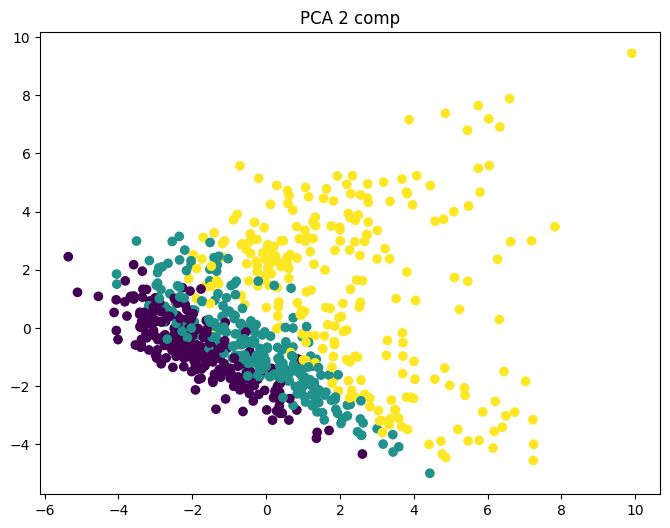

In [45]:
plt.figure(figsize=(8,6))
plt.scatter(data_pca2[:,0], data_pca2[:,1], c=data2['target'])
plt.title("PCA 2 comp")

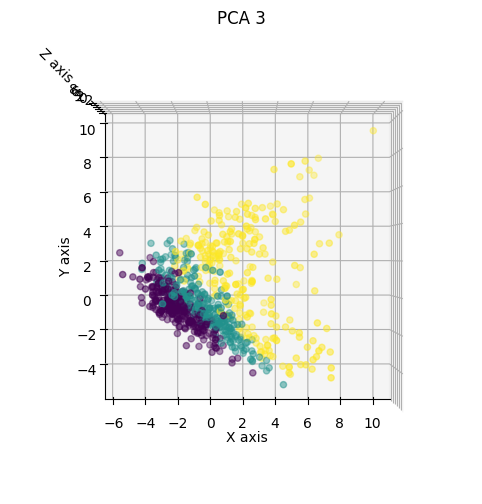

In [46]:
import matplotlib.pyplot as plt
# from mpl_toolkits.mplot3d import Axes3D

# Create a figure
fig = plt.figure(figsize=(8, 6))

# Add 3D subplot
ax = fig.add_subplot(111, projection='3d')

# Plot a 3D scatter plot
ax.scatter(data_pca2[:,0], data_pca2[:,1], data_pca2[:,2], c=data2['target'])

plt.title("PCA 3")
# Label axes
ax.set_xlabel('X axis')
ax.set_ylabel('Y axis')
ax.set_zlabel('Z axis')

# Rotate the plot to view accordingly
ax.view_init(elev=90, azim=-90)

# Show the plot
plt.show()


In [47]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

# Standardize the data
scaler = StandardScaler()
data_standardized = scaler.fit_transform(modified_data)

# Perform PCA
pca = PCA()
pca_results = pca.fit_transform(data_standardized)

# Explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_


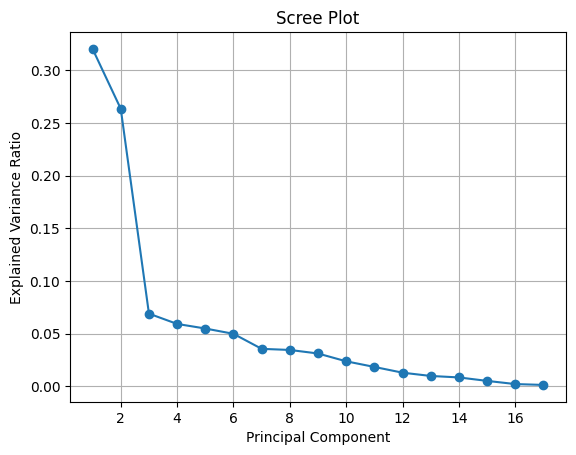

In [48]:
plt.plot(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, marker='o')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.title('Scree Plot')
plt.grid(True)
plt.show()


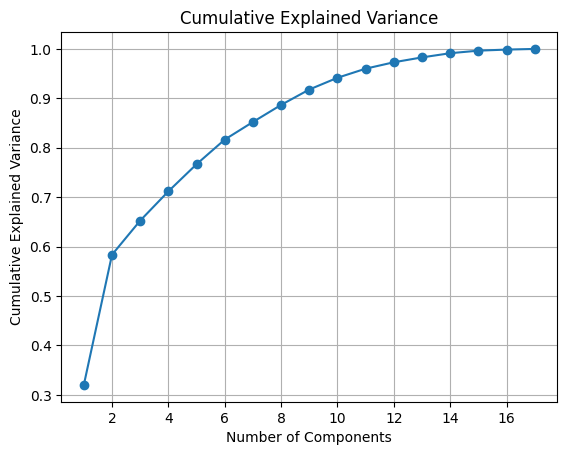

In [49]:
cumulative_variance = np.cumsum(explained_variance_ratio)
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Explained Variance')
plt.grid(True)
plt.show()


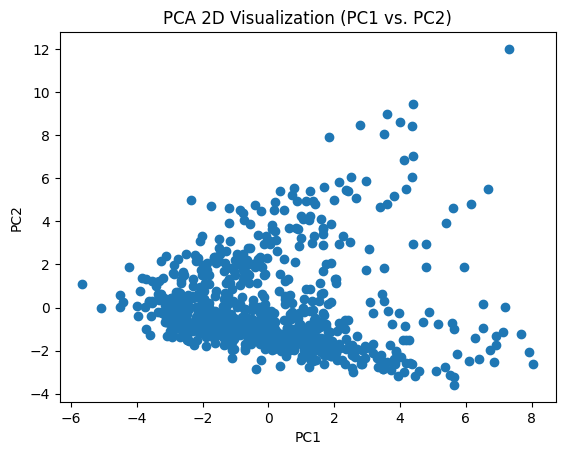

In [50]:
plt.scatter(pca_results[:, 0], pca_results[:, 1])
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PCA 2D Visualization (PC1 vs. PC2)')
plt.show()


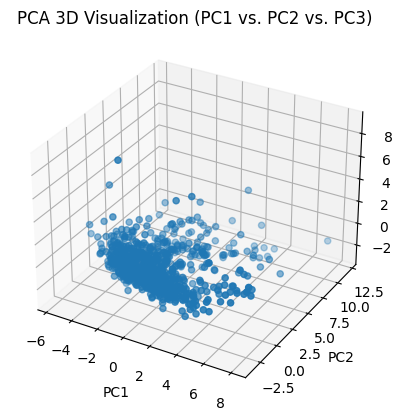

In [51]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(pca_results[:, 0], pca_results[:, 1], pca_results[:, 2])
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
ax.set_title('PCA 3D Visualization (PC1 vs. PC2 vs. PC3)')
plt.show()


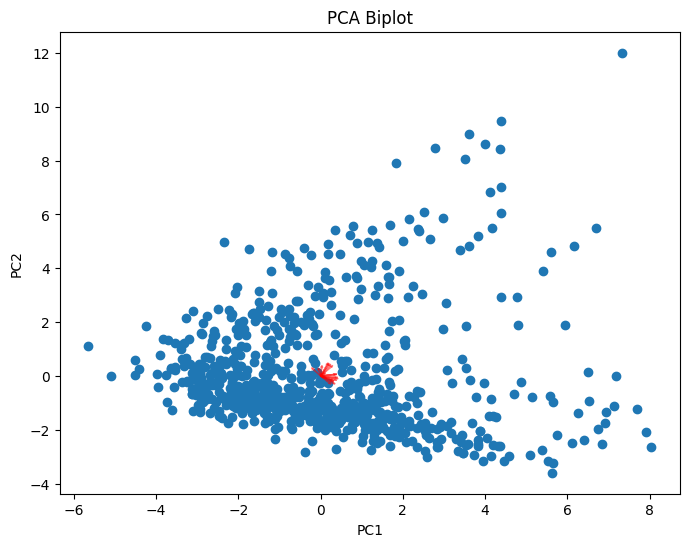

In [52]:
plt.figure(figsize=(8, 6))
plt.scatter(pca_results[:, 0], pca_results[:, 1])
for i in range(pca.components_.shape[1]):
    plt.arrow(0, 0, pca.components_[0, i], pca.components_[1, i], color='r', alpha=0.5, head_width=0.05)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PCA Biplot')
plt.show()


C:\Users\arpan\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


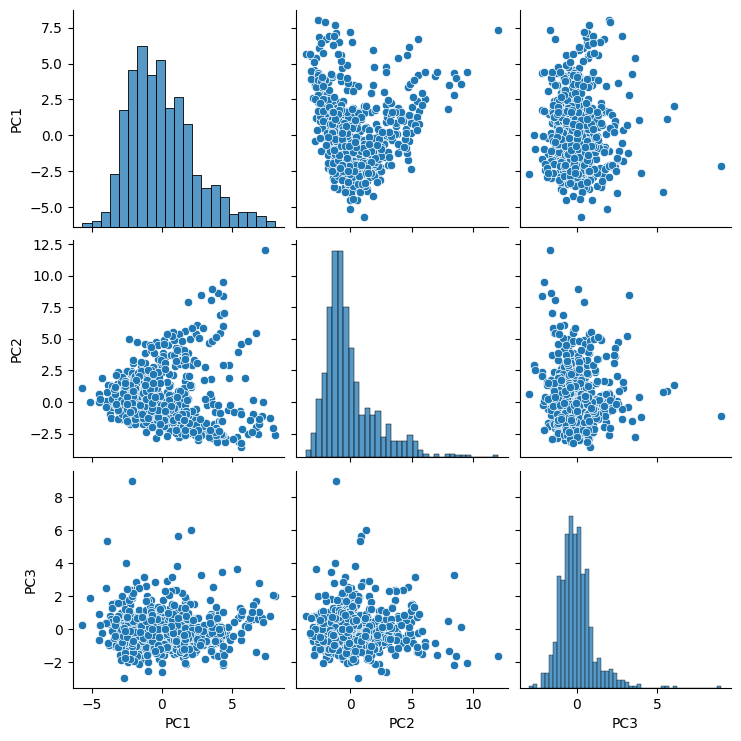

In [53]:
df_pca = pd.DataFrame(pca_results[:, :3], columns=['PC1', 'PC2', 'PC3'])
sns.pairplot(df_pca)
#plt.title('PCA Pair Plot')
plt.show()


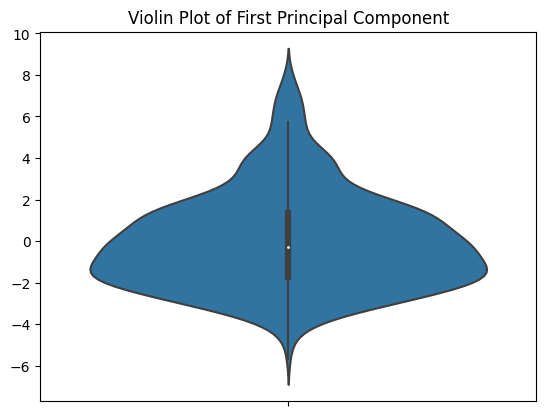

In [54]:
sns.violinplot(y=pca_results[:, 0])
plt.title('Violin Plot of First Principal Component')
plt.show()

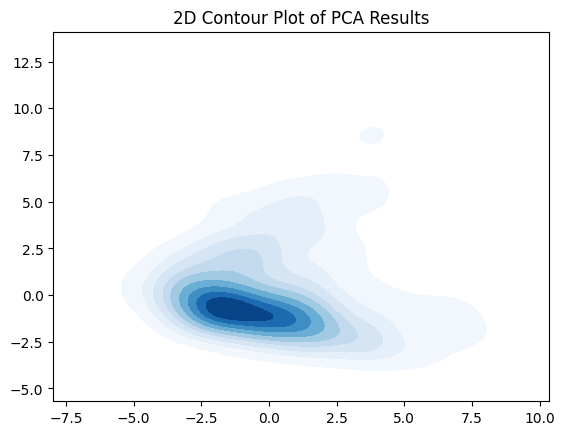

In [55]:
sns.kdeplot(x=pca_results[:, 0], y=pca_results[:, 1], cmap='Blues', fill=True)
plt.title('2D Contour Plot of PCA Results')
plt.show()


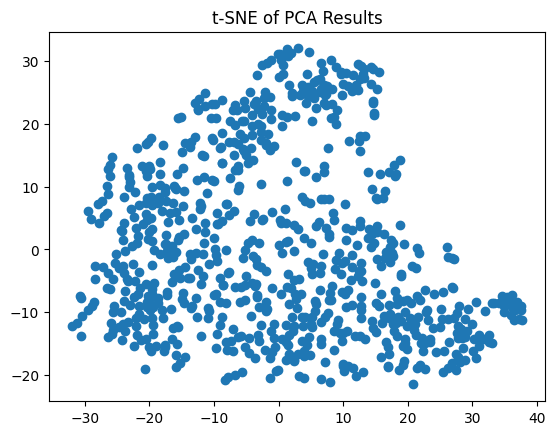

In [56]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2)
pca_tsne = tsne.fit_transform(pca_results)

plt.scatter(pca_tsne[:, 0], pca_tsne[:, 1])
plt.title('t-SNE of PCA Results')
plt.show()

## Applying Sparse PCA

In [57]:
from sklearn.decomposition import SparsePCA
from sklearn.preprocessing import StandardScaler

# Step 1: Standardize the data
scaler = StandardScaler()
standardized_data2 = scaler.fit_transform(modified_data)

# Step 2: Apply Sparse PCA
# Define the Sparse PCA model
n_components = 5 
sparse_pca = SparsePCA(n_components=n_components, alpha=1, random_state=42)

# Fit the Sparse PCA model and transform the data
sparse_pca_result = sparse_pca.fit_transform(standardized_data2)

# Output
print("Sparse PCA Components:")
print(sparse_pca.components_)  # Principal components
print("\nTransformed Data:")
print(sparse_pca_result)  # Data in reduced dimensions


Sparse PCA Components:
[[ 0.09533914  0.04234705  0.          0.05684628  0.         -0.02861046
   0.          0.45664944  0.52240534  0.26099919  0.          0.
   0.         -0.47317359  0.06736106  0.43660983  0.12826374]
 [ 0.46337159  0.48604923  0.48655462  0.          0.00918545  0.47462625
   0.25388851 -0.04002139  0.         -0.00272037  0.02901894  0.
   0.          0.09599851 -0.1039897   0.00359194  0.        ]
 [ 0.         -0.00758018  0.00353179  0.          0.          0.04379247
   0.17216351 -0.16908905 -0.04757458  0.61733209  0.65505321  0.
   0.          0.         -0.22846726  0.         -0.27409245]
 [-0.         -0.         -0.         -0.10991321 -0.14555901 -0.
  -0.13654913 -0.09372472 -0.13675147 -0.         -0.         -0.67538937
  -0.67294218 -0.         -0.         -0.10769745 -0.        ]
 [ 0.04596518 -0.         -0.          0.55921355  0.56291659 -0.
  -0.25281896  0.07070689 -0.13727665 -0.         -0.         -0.
  -0.         -0.          0.3886

In [58]:
# Reconstruct the data using the sparse PCA components
reconstructed_data = sparse_pca.transform(standardized_data2).dot(sparse_pca.components_)

# Compute the reconstruction error
reconstruction_error = np.mean((standardized_data2 - reconstructed_data) ** 2)
print("Reconstruction error:", reconstruction_error)


Reconstruction error: 0.2376794669152172


In [59]:
# Total variance of original data
total_variance = np.var(standardized_data2, axis=0).sum()

# Variance retained by Sparse PCA
retained_variance = np.var(sparse_pca_result, axis=0).sum()

# Ratio of variance retained
variance_ratio = retained_variance / total_variance
print("Variance retained ratio:", variance_ratio)


Variance retained ratio: 0.6985298079549426


In [60]:

# Number of non-zero features per component
non_zero_features = np.sum(sparse_pca.components_ != 0, axis=1)
print("Number of features actively used in each component:")
print(non_zero_features)


Number of features actively used in each component:
[11 12 10  8  9]


Reconstruction error for 3 components: 0.3499493805963222
Variance retained ratio for 3 components: 0.6215496295229287
Number of features actively used in each component for 3 components:
[15 15  9]
Reconstruction error for 4 components: 0.291666309649028
Variance retained ratio for 4 components: 0.6564028567636854
Number of features actively used in each component for 4 components:
[13 12  9  9]
Reconstruction error for 5 components: 0.2376794669152172
Variance retained ratio for 5 components: 0.6985298079549426
Number of features actively used in each component for 5 components:
[11 12 10  8  9]
Reconstruction error for 6 components: 0.18868684261825047
Variance retained ratio for 6 components: 0.7459295127159578
Number of features actively used in each component for 6 components:
[11  9  6  9 10  8]
Reconstruction error for 7 components: 0.15420741523114098
Variance retained ratio for 7 components: 0.7591959943756836
Number of features actively used in each component for 7 component

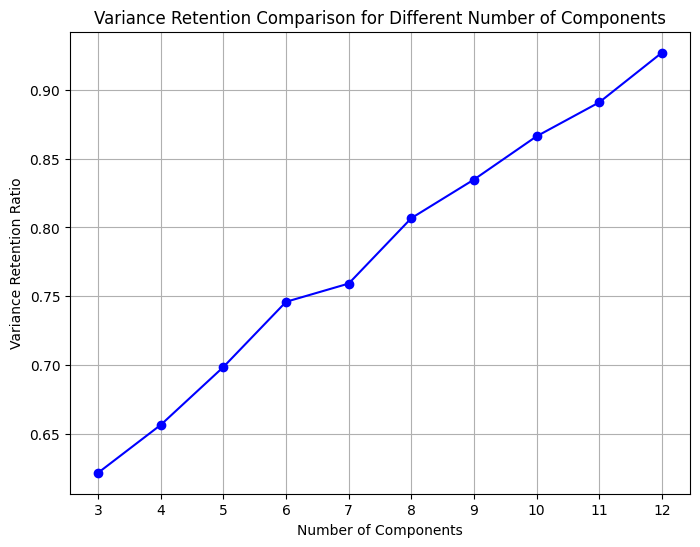

In [61]:

from sklearn.decomposition import SparsePCA
from sklearn.preprocessing import StandardScaler

# Step 1: Standardize the data
scaler = StandardScaler()
standardized_data2 = scaler.fit_transform(modified_data)

variance_ratios = []

# Loop over n_components from 3 to 12
for n_components in range(3, 13):
    # Step 2: Apply Sparse PCA for each value of n_components
    sparse_pca = SparsePCA(n_components=n_components, alpha=1, random_state=42)

    # Fit the Sparse PCA model and transform the data
    sparse_pca_result = sparse_pca.fit_transform(standardized_data2)

    # Reconstruct the data using the sparse PCA components
    reconstructed_data = sparse_pca.transform(standardized_data2).dot(sparse_pca.components_)

    # Compute the reconstruction error
    reconstruction_error = np.mean((standardized_data2 - reconstructed_data) ** 2)
    print(f"Reconstruction error for {n_components} components:", reconstruction_error)

    # Total variance of original data
    total_variance = np.var(standardized_data2, axis=0).sum()

    # Variance retained by Sparse PCA
    retained_variance = np.var(sparse_pca_result, axis=0).sum()

    # Ratio of variance retained
    variance_ratio = retained_variance / total_variance
    variance_ratios.append(variance_ratio)
    print(f"Variance retained ratio for {n_components} components:", variance_ratio)

    # Optional: Display number of non-zero features for each component
    non_zero_features = np.sum(sparse_pca.components_ != 0, axis=1)
    print(f"Number of features actively used in each component for {n_components} components:")
    print(non_zero_features)

# Step 3: Plot the variance retention comparison
plt.figure(figsize=(8, 6))
plt.plot(range(3, 13), variance_ratios, marker='o', linestyle='-', color='b')
plt.title('Variance Retention Comparison for Different Number of Components')
plt.xlabel('Number of Components')
plt.ylabel('Variance Retention Ratio')
plt.xticks(range(3, 13))
plt.grid(True)
plt.show()


   n_components  Reconstruction Error  Variance Retained Ratio  \
0             3              0.349949                 0.621550   
1             4              0.291666                 0.656403   
2             5              0.237679                 0.698530   
3             6              0.188687                 0.745930   
4             7              0.154207                 0.759196   
5             8              0.120044                 0.806789   
6             9              0.086665                 0.834873   
7            10              0.061183                 0.866348   
8            11              0.042039                 0.891043   
9            12              0.029076                 0.927159   

                      Non-Zero Features  
0                           [15, 15, 9]  
1                        [13, 12, 9, 9]  
2                    [11, 12, 10, 8, 9]  
3                  [11, 9, 6, 9, 10, 8]  
4                 [8, 7, 3, 9, 7, 8, 6]  
5              [7, 7,

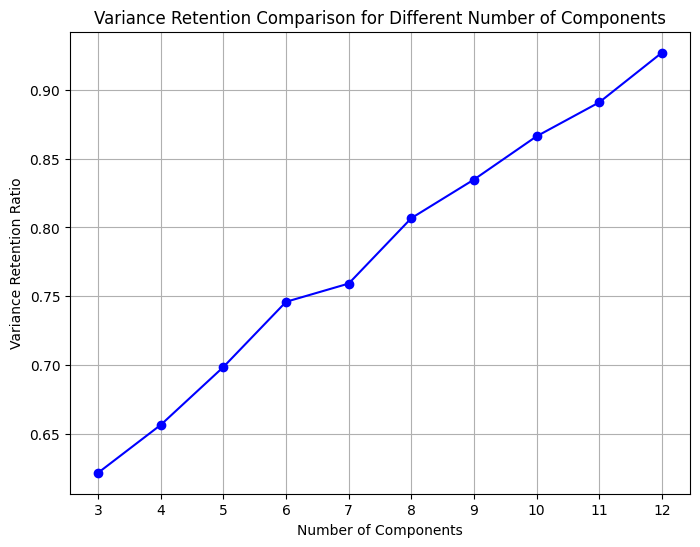

In [62]:
from sklearn.decomposition import SparsePCA

scaler = StandardScaler()
standardized_data2 = scaler.fit_transform(modified_data)
results = []
for n_components in range(3, 13):
    sparse_pca = SparsePCA(n_components=n_components, alpha=1, random_state=42)
    sparse_pca_result = sparse_pca.fit_transform(standardized_data2)
    reconstructed_data = sparse_pca.transform(standardized_data2).dot(sparse_pca.components_)
    reconstruction_error = np.mean((standardized_data2 - reconstructed_data) ** 2)
    total_variance = np.var(standardized_data2, axis=0).sum()
    retained_variance = np.var(sparse_pca_result, axis=0).sum()
    variance_ratio = retained_variance / total_variance
    non_zero_features = np.sum(sparse_pca.components_ != 0, axis=1)
    results.append({
        'n_components': n_components,
        'Reconstruction Error': reconstruction_error,
        'Variance Retained Ratio': variance_ratio,
        'Non-Zero Features': non_zero_features.tolist()
    })
results_df = pd.DataFrame(results)
print(results_df)
plt.figure(figsize=(8, 6))
plt.plot(results_df['n_components'], results_df['Variance Retained Ratio'], marker='o', linestyle='-', color='b')
plt.title('Variance Retention Comparison for Different Number of Components')
plt.xlabel('Number of Components')
plt.ylabel('Variance Retention Ratio')
plt.xticks(range(3, 13))
plt.grid(True)
plt.show()

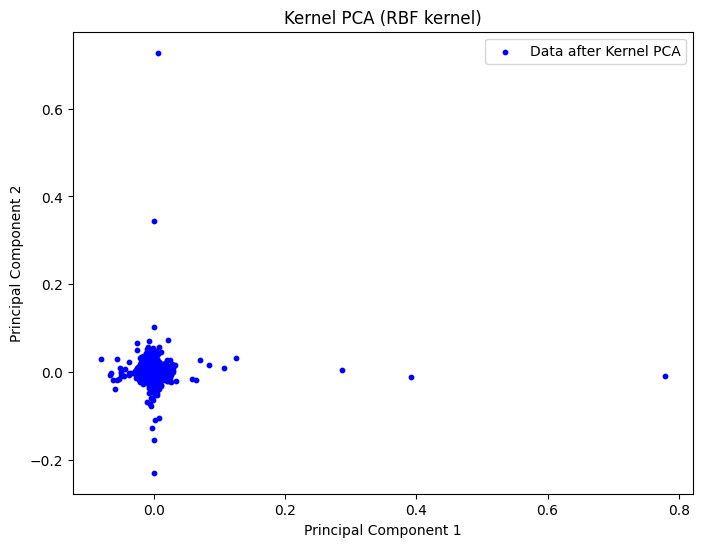

In [63]:

from sklearn.decomposition import KernelPCA




# Apply Kernel PCA (RBF kernel in this case)
kpca = KernelPCA(kernel='rbf', gamma=15)  # gamma is the kernel coefficient
X_kpca = kpca.fit_transform(modified_data)

# Plotting the results
plt.figure(figsize=(8, 6))
plt.scatter(X_kpca[:, 0], X_kpca[:, 1], color='blue', s=10, label="Data after Kernel PCA")
plt.title('Kernel PCA (RBF kernel)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()


Variance Retention per component:
[4.63592175e-01 4.07231301e-01 6.72685618e-02 3.14375235e-02
 1.55344012e-02 6.69349440e-03 4.01290505e-03 3.52361835e-03
 4.23129655e-04 2.72705916e-04 4.59094677e-06 2.25727115e-06
 1.69537043e-06 8.71385254e-07 3.87597507e-07 2.90668297e-07
 9.08947118e-08]
Cumulative variance retention: 1.0000


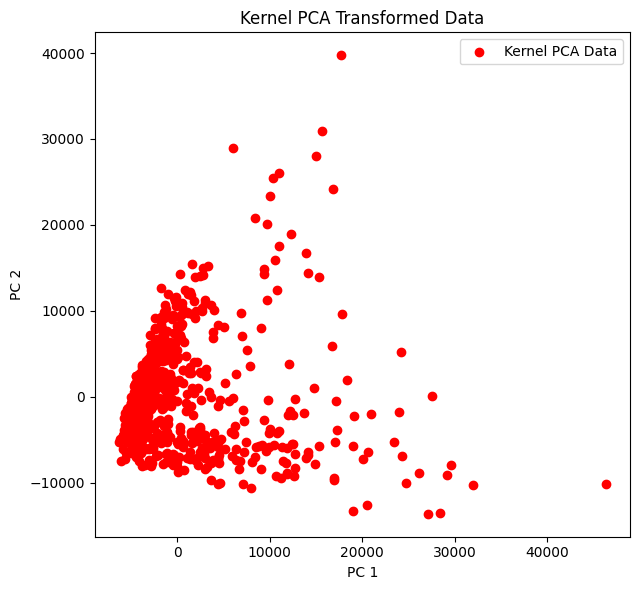

In [64]:

from sklearn.decomposition import KernelPCA



# modified_data has shape (777, 17) where 777 is the number of samples and 17 is the number of features.

# Apply Kernel PCA using an RBF (Radial Basis Function) kernel
kpca = KernelPCA(kernel='linear', gamma=15)
X_kpca = kpca.fit_transform(modified_data)

# Calculate variance retention for each component
# Variance retention is the variance of the components divided by the total variance of the original data

# The variance explained by each component of the transformed data
explained_variance_ratio = np.var(X_kpca, axis=0) / np.var(modified_data, axis=0).sum()

# Print the variance retention (explained variance ratio)
print("Variance Retention per component:")
print(explained_variance_ratio)

# Cumulative explained variance
cumulative_explained_variance = np.cumsum(explained_variance_ratio)
print(f"Cumulative variance retention: {cumulative_explained_variance[-1]:.4f}")

# Plot the original and transformed data
plt.figure(figsize=(12, 6))

# Original Data (assuming modified_data has 17 features, we can reduce the dimensions for visualization)
if modified_data.shape[1] == 2:
    plt.subplot(1, 2, 1)
    plt.title("Original Data")
    plt.scatter(modified_data[:, 0], modified_data[:, 1], c='blue', label='Original Data')
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.legend()

# Kernel PCA Transformed Data (since you have 17 features, we plot the first two components for visualization)
plt.subplot(1, 2, 2)
plt.title("Kernel PCA Transformed Data")
plt.scatter(X_kpca[:, 0], X_kpca[:, 1], c='red', label='Kernel PCA Data')
plt.xlabel("PC 1")
plt.ylabel("PC 2")
plt.legend()

plt.tight_layout()
plt.show()


Variance Retention per component (with feature names):
Apps: 0.4636
Accept: 0.4072
Enroll: 0.0673
Top10perc: 0.0314
Top25perc: 0.0155
F.Undergrad: 0.0067
P.Undergrad: 0.0040
Outstate: 0.0035
Room.Board: 0.0004
Books: 0.0003
Personal: 0.0000
PhD: 0.0000
Terminal: 0.0000
S.F.Ratio: 0.0000
perc.alumni: 0.0000
Expend: 0.0000
Grad.Rate: 0.0000
Cumulative variance retention: 1.0000


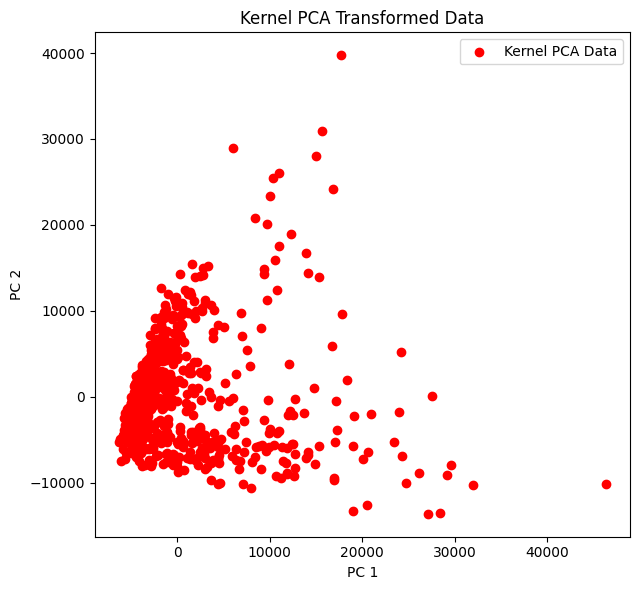

In [65]:
import numpy as np
from sklearn.decomposition import KernelPCA
import matplotlib.pyplot as plt

# Apply Kernel PCA using an RBF (Radial Basis Function) kernel
kpca = KernelPCA(kernel='linear', gamma=15)
X_kpca = kpca.fit_transform(modified_data)

# Calculate variance retention for each component
# Variance retention is the variance of the components divided by the total variance of the original data

# The variance explained by each component of the transformed data
explained_variance_ratio = np.var(X_kpca, axis=0) / np.var(modified_data, axis=0).sum()

# Print the variance retention (explained variance ratio) along with feature names
print("Variance Retention per component (with feature names):")
for i, var_retention in enumerate(explained_variance_ratio):
    print(f"{modified_data.columns[i]}: {var_retention:.4f}")

# Cumulative explained variance
cumulative_explained_variance = np.cumsum(explained_variance_ratio)
print(f"Cumulative variance retention: {cumulative_explained_variance[-1]:.4f}")

# Plot the original and transformed data
plt.figure(figsize=(12, 6))


if modified_data.shape[1] == 2:
    plt.subplot(1, 2, 1)
    plt.title("Original Data")
    plt.scatter(modified_data.iloc[:, 0], modified_data.iloc[:, 1], c='blue', label='Original Data')
    plt.xlabel(modified_data.columns[0])
    plt.ylabel(modified_data.columns[1])
    plt.legend()


plt.subplot(1, 2, 2)
plt.title("Kernel PCA Transformed Data")
plt.scatter(X_kpca[:, 0], X_kpca[:, 1], c='red', label='Kernel PCA Data')
plt.xlabel("PC 1")
plt.ylabel("PC 2")
plt.legend()

plt.tight_layout()
plt.show()


Explained variance ratio of each component: [0.46359217 0.4072313  0.06726856]
Total variance retained after PCA: 0.9381


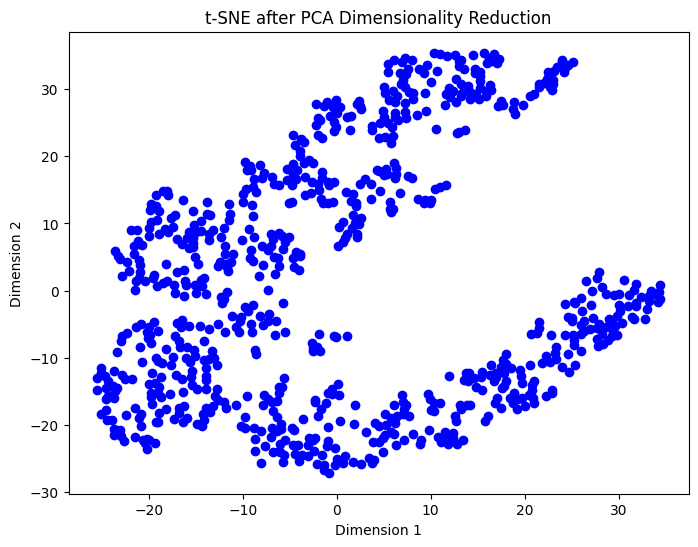

In [66]:

from sklearn.decomposition import PCA
from sklearn.manifold import TSNE


X = modified_data.values  

# Step 1: Apply PCA to reduce dimensions while retaining variance
pca = PCA(n_components=3) 
X_pca = pca.fit_transform(X)

# Print the explained variance ratio (this shows the variance retention)
print(f'Explained variance ratio of each component: {pca.explained_variance_ratio_}')
print(f'Total variance retained after PCA: {np.sum(pca.explained_variance_ratio_):.4f}')

# Step 2: Apply t-SNE on the reduced data from PCA
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X_pca)

# Step 3: Create a DataFrame with the reduced dimensions for visualization
tsne_df = pd.DataFrame(X_tsne, columns=['Dimension 1', 'Dimension 2'])

# Step 4: Plot the t-SNE results
plt.figure(figsize=(8, 6))
plt.scatter(tsne_df['Dimension 1'], tsne_df['Dimension 2'], c='blue', marker='o')
plt.title('t-SNE after PCA Dimensionality Reduction')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.show()


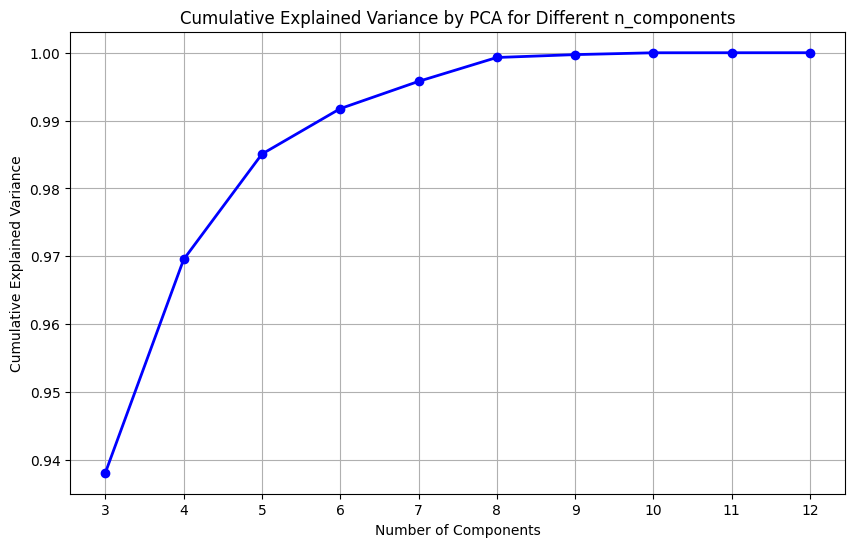

n_components=3, Cumulative Variance Retained: 0.9381
n_components=4, Cumulative Variance Retained: 0.9695
n_components=5, Cumulative Variance Retained: 0.9851
n_components=6, Cumulative Variance Retained: 0.9918
n_components=7, Cumulative Variance Retained: 0.9958
n_components=8, Cumulative Variance Retained: 0.9993
n_components=9, Cumulative Variance Retained: 0.9997
n_components=10, Cumulative Variance Retained: 1.0000
n_components=11, Cumulative Variance Retained: 1.0000
n_components=12, Cumulative Variance Retained: 1.0000


In [67]:


# Assuming modified_data is your dataset with shape (777, 17)
X = modified_data.values  # Replace this with your actual dataset

# List to store explained variance ratios and cumulative variance
explained_variance_ratios = []
cumulative_variance = []

# Range of n_components from 3 to 12
n_components_range = list(range(3, 13))

# Apply PCA for each n_components value and capture variance explained
for n_components in n_components_range:
    pca = PCA(n_components=n_components)
    X_pca = pca.fit_transform(X)
    explained_variance_ratios.append(pca.explained_variance_ratio_)
    cumulative_variance.append(np.sum(pca.explained_variance_ratio_))

# Plot the cumulative explained variance for different n_components
plt.figure(figsize=(10, 6))
plt.plot(n_components_range, cumulative_variance, marker='o', color='b', linestyle='-', linewidth=2)

plt.title('Cumulative Explained Variance by PCA for Different n_components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid(True)
plt.xticks(n_components_range)  # Ensure all x-values from 3 to 12 are labeled
plt.show()

# Print the cumulative variance retention for each n_components
for n_components, var in zip(n_components_range, cumulative_variance):
    print(f'n_components={n_components}, Cumulative Variance Retained: {var:.4f}')



For n_components=3:
Component 1:
Top contributing features: F.Undergrad, Apps, Accept, Expend, Enroll
Variance explained: 0.4636
Component 2:
Top contributing features: Expend, Outstate, F.Undergrad, Room.Board, P.Undergrad
Variance explained: 0.4072
Component 3:
Top contributing features: Outstate, Expend, Apps, Accept, Room.Board
Variance explained: 0.0673

For n_components=4:
Component 1:
Top contributing features: F.Undergrad, Apps, Accept, Expend, Enroll
Variance explained: 0.4636
Component 2:
Top contributing features: Expend, Outstate, F.Undergrad, Room.Board, P.Undergrad
Variance explained: 0.4072
Component 3:
Top contributing features: Outstate, Expend, Apps, Accept, Room.Board
Variance explained: 0.0673
Component 4:
Top contributing features: Apps, F.Undergrad, P.Undergrad, Outstate, Accept
Variance explained: 0.0314

For n_components=5:
Component 1:
Top contributing features: F.Undergrad, Apps, Accept, Expend, Enroll
Variance explained: 0.4636
Component 2:
Top contributing 

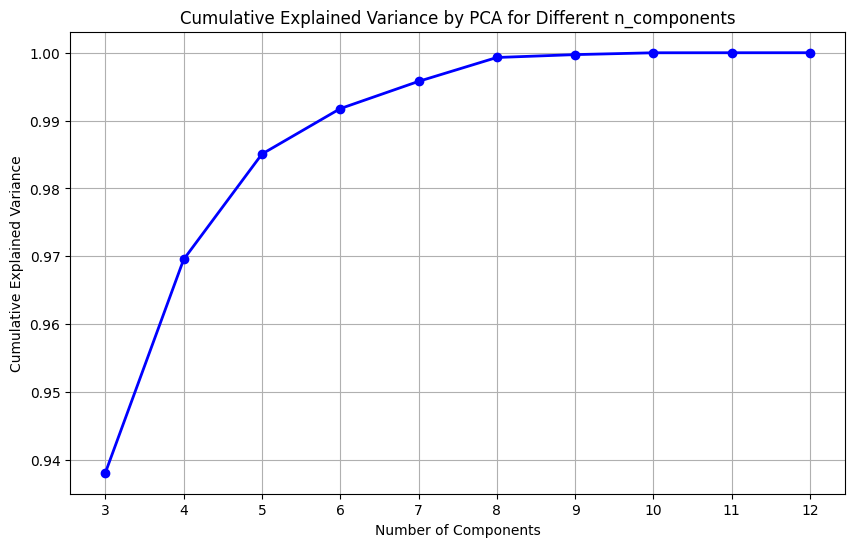

n_components=3, Cumulative Variance Retained: 0.9381
n_components=4, Cumulative Variance Retained: 0.9695
n_components=5, Cumulative Variance Retained: 0.9851
n_components=6, Cumulative Variance Retained: 0.9918
n_components=7, Cumulative Variance Retained: 0.9958
n_components=8, Cumulative Variance Retained: 0.9993
n_components=9, Cumulative Variance Retained: 0.9997
n_components=10, Cumulative Variance Retained: 1.0000
n_components=11, Cumulative Variance Retained: 1.0000
n_components=12, Cumulative Variance Retained: 1.0000


In [68]:


# Assuming modified_data is your dataset with shape (777, 17)
X = modified_data.values  # Replace this with your actual dataset

# Get the column names
column_names = modified_data.columns

# List to store explained variance ratios and cumulative variance
explained_variance_ratios = []
cumulative_variance = []

# Range of n_components from 3 to 12
n_components_range = list(range(3, 13))

# Apply PCA for each n_components value and capture variance explained
for n_components in n_components_range:
    pca = PCA(n_components=n_components)
    X_pca = pca.fit_transform(X)
    
    # Capture explained variance ratios for each component
    explained_variance_ratios.append(pca.explained_variance_ratio_)
    
    # Print the components and their explained variance ratio for each iteration
    print(f"\nFor n_components={n_components}:")
    
    # Get the column names associated with each component
    for i, component in enumerate(pca.components_):
        print(f"Component {i + 1}:")
        
        # Get the original feature names associated with this component
        component_features = sorted(zip(column_names, component), key=lambda x: abs(x[1]), reverse=True)
        
        # Print top features for each component
        print(f"Top contributing features: {', '.join([feature for feature, _ in component_features[:5]])}")
        
        # Print the variance explained by this component
        print(f"Variance explained: {pca.explained_variance_ratio_[i]:.4f}")

    cumulative_variance.append(np.sum(pca.explained_variance_ratio_))

# Plot the cumulative explained variance for different n_components
plt.figure(figsize=(10, 6))
plt.plot(n_components_range, cumulative_variance, marker='o', color='b', linestyle='-', linewidth=2)

plt.title('Cumulative Explained Variance by PCA for Different n_components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid(True)
plt.xticks(n_components_range)  # Ensure all x-values from 3 to 12 are labeled
plt.show()

# Print the cumulative variance retention for each n_components
for n_components, var in zip(n_components_range, cumulative_variance):
    print(f'n_components={n_components}, Cumulative Variance Retained: {var:.4f}')


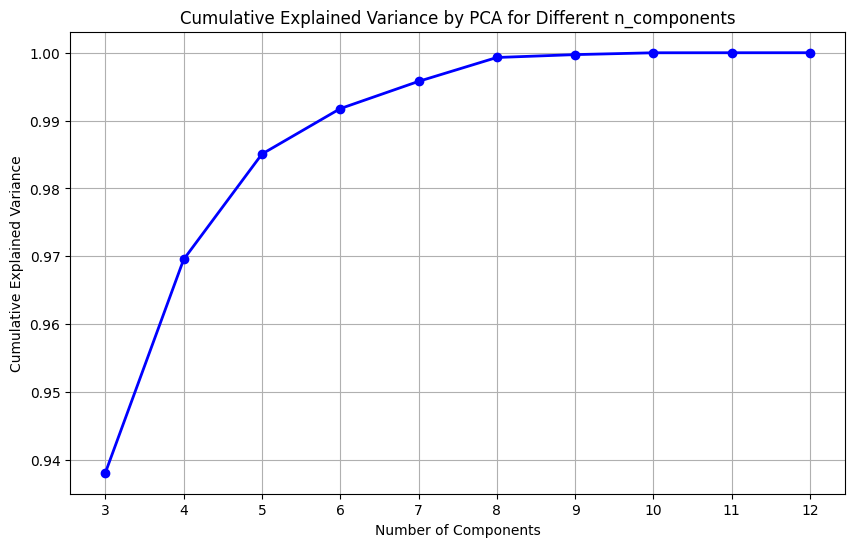

n_components=3, Cumulative Variance Retained: 0.9381
n_components=4, Cumulative Variance Retained: 0.9695
n_components=5, Cumulative Variance Retained: 0.9851
n_components=6, Cumulative Variance Retained: 0.9918
n_components=7, Cumulative Variance Retained: 0.9958
n_components=8, Cumulative Variance Retained: 0.9993
n_components=9, Cumulative Variance Retained: 0.9997
n_components=10, Cumulative Variance Retained: 1.0000
n_components=11, Cumulative Variance Retained: 1.0000
n_components=12, Cumulative Variance Retained: 1.0000


In [69]:

from sklearn.decomposition import PCA

from openpyxl import Workbook
from openpyxl.styles import Font, Border, Side


X = modified_data.values  

# Get the column names
column_names = modified_data.columns

# Create a new workbook
wb = Workbook()
ws = wb.active
ws.title = "PCA Results"

# Add a header for the entire sheet
ws.append(["PCA Results for Different n_components"])
ws.append([])  # Add an empty row for spacing

# Styling for headers and borders
header_font = Font(bold=True)
border_style = Border(left=Side(style='thin'), right=Side(style='thin'),
                       top=Side(style='thin'), bottom=Side(style='thin'))

# Range of n_components from 3 to 12
n_components_range = list(range(3, 13))

# Variable to keep track of the starting row for each table
current_row = 2

# Apply PCA for each n_components value and capture variance explained
for n_components in n_components_range:
    pca = PCA(n_components=n_components)
    X_pca = pca.fit_transform(X)  # Fit the PCA model
    
    # Add a title for each table (for the current n_components)
    ws.append([f"Results for n_components = {n_components}"])
    ws.append(["Component", "Top Contributing Features", "Variance Explained"])
    
    # Apply header formatting
    for col in range(1, 4):
        ws.cell(row=current_row + 1, column=col).font = header_font
    
    # Print and store the components and their explained variance ratio for each iteration
    for i, component in enumerate(pca.components_):
        # Get the original feature names associated with this component
        component_features = sorted(zip(column_names, component), key=lambda x: abs(x[1]), reverse=True)
        
        # Get top 5 contributing features
        top_features = ', '.join([feature for feature, _ in component_features[:5]])
        
        # Variance explained by this component
        variance_explained = pca.explained_variance_ratio_[i]
        
        # Store the results in the Excel sheet
        ws.append([f"Component {i + 1}", top_features, variance_explained])
        
        # Apply borders to each row
        for col in range(1, 4):
            ws.cell(row=current_row + 2, column=col).border = border_style
        
        current_row += 1  # Move to the next row for the next component
    
    # Add a blank row for spacing before the next table
    ws.append([])
    current_row += 1

# Save the workbook
wb.save("Beautified_PCA_Results.xlsx")

# Plot the cumulative explained variance for different n_components
plt.figure(figsize=(10, 6))
cumulative_variance = []
for n_components in n_components_range:
    pca = PCA(n_components=n_components)
    pca.fit(X)  # Fit the PCA model
    cumulative_variance.append(np.sum(pca.explained_variance_ratio_))

plt.plot(n_components_range, cumulative_variance, marker='o', color='b', linestyle='-', linewidth=2)

plt.title('Cumulative Explained Variance by PCA for Different n_components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid(True)
plt.xticks(n_components_range)  # Ensure all x-values from 3 to 12 are labeled
plt.show()

# Print the cumulative variance retention for each n_components
for n_components, var in zip(n_components_range, cumulative_variance):
    print(f'n_components={n_components}, Cumulative Variance Retained: {var:.4f}')


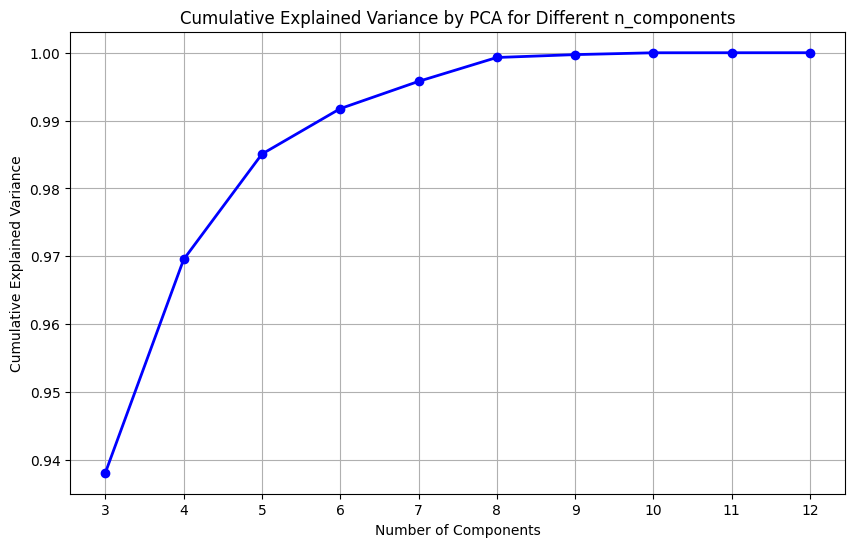

n_components=3, Cumulative Variance Retained: 0.9381
n_components=4, Cumulative Variance Retained: 0.9695
n_components=5, Cumulative Variance Retained: 0.9851
n_components=6, Cumulative Variance Retained: 0.9918
n_components=7, Cumulative Variance Retained: 0.9958
n_components=8, Cumulative Variance Retained: 0.9993
n_components=9, Cumulative Variance Retained: 0.9997
n_components=10, Cumulative Variance Retained: 1.0000
n_components=11, Cumulative Variance Retained: 1.0000
n_components=12, Cumulative Variance Retained: 1.0000


In [70]:

from sklearn.decomposition import PCA

from openpyxl import Workbook
from openpyxl.styles import Font, Border, Side

# Assuming modified_data is your dataset with shape (777, 17)
X = modified_data.values  # Replace this with your actual dataset

# Get the column names
column_names = modified_data.columns

# Create a new workbook
wb = Workbook()
ws = wb.active
ws.title = "PCA Results"

# Add a header for the entire sheet
ws.append(["PCA Results for Different n_components"])
ws.append([])  # Add an empty row for spacing

# Styling for headers and borders
header_font = Font(bold=True)
border_style = Border(left=Side(style='thin'), right=Side(style='thin'),
                       top=Side(style='thin'), bottom=Side(style='thin'))

# Range of n_components from 3 to 12
n_components_range = list(range(3, 13))

# Variable to keep track of the starting row for each table
current_row = 2

# Apply PCA for each n_components value and capture variance explained
for n_components in n_components_range:
    pca = PCA(n_components=n_components)
    X_pca = pca.fit_transform(X)  # Fit the PCA model
    
    # Add a title for each table (for the current n_components)
    ws.append([f"Results for n_components = {n_components}"])
    ws.append(["Component", "Top Contributing Features", "Variance Explained"])
    
    # Apply header formatting
    for col in range(1, 4):
        ws.cell(row=current_row + 1, column=col).font = header_font
    
    # Print and store the components and their explained variance ratio for each iteration
    for i, component in enumerate(pca.components_):
        # Get the original feature names associated with this component
        component_features = sorted(zip(column_names, component), key=lambda x: abs(x[1]), reverse=True)
        
        # Get top 5 contributing features
        top_features = ', '.join([feature for feature, _ in component_features[:5]])
        
        # Variance explained by this component
        variance_explained = pca.explained_variance_ratio_[i]
        
        # Store the results in the Excel sheet
        ws.append([f"Component {i + 1}", top_features, variance_explained])
        
        # Apply borders to each row
        for col in range(1, 4):
            ws.cell(row=current_row + 2, column=col).border = border_style
        
        current_row += 1  # Move to the next row for the next component
    
    # Add a blank row for spacing before the next table
    ws.append([])
    current_row += 1

# Save the workbook
wb.save("Beautified_PCA_Results.xlsx")

# Plot the cumulative explained variance for different n_components
plt.figure(figsize=(10, 6))
cumulative_variance = []
for n_components in n_components_range:
    pca = PCA(n_components=n_components)
    pca.fit(X)  # Fit the PCA model
    cumulative_variance.append(np.sum(pca.explained_variance_ratio_))

plt.plot(n_components_range, cumulative_variance, marker='o', color='b', linestyle='-', linewidth=2)

plt.title('Cumulative Explained Variance by PCA for Different n_components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid(True)
plt.xticks(n_components_range)  # Ensure all x-values from 3 to 12 are labeled
plt.show()

# Print the cumulative variance retention for each n_components
for n_components, var in zip(n_components_range, cumulative_variance):
    print(f'n_components={n_components}, Cumulative Variance Retained: {var:.4f}')


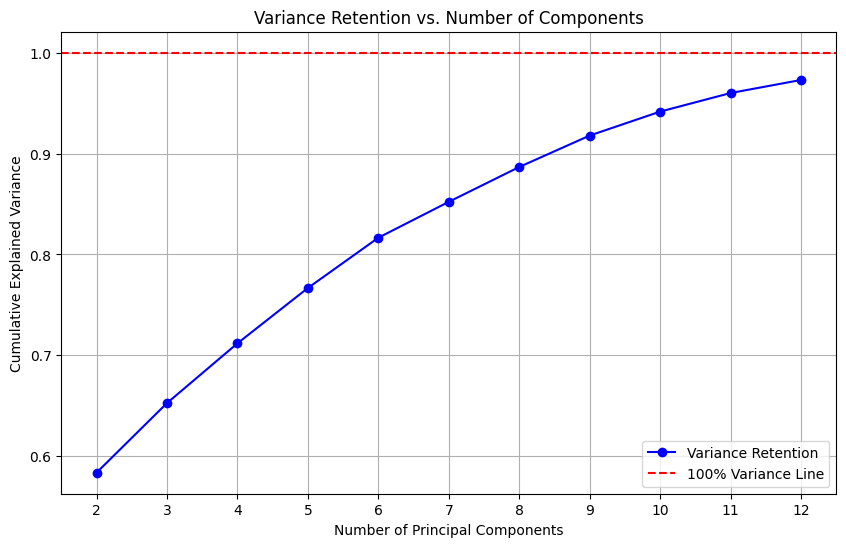

Cumulative Explained Variance for 2 to 12 components:
2 components: 0.5836 (or 58.36%)
3 components: 0.6526 (or 65.26%)
4 components: 0.7118 (or 71.18%)
5 components: 0.7667 (or 76.67%)
6 components: 0.8166 (or 81.66%)
7 components: 0.8522 (or 85.22%)
8 components: 0.8867 (or 88.67%)
9 components: 0.9179 (or 91.79%)
10 components: 0.9416 (or 94.16%)
11 components: 0.9600 (or 96.00%)
12 components: 0.9730 (or 97.30%)


In [71]:

# Step 1: Standardize the data
def standardize_data(data):
    mean = np.mean(data, axis=0)
    std_dev = np.std(data, axis=0)
    return (data - mean) / std_dev

data_standardized = standardize_data(modified_data)
# Step 2: Compute the covariance matrix
def compute_covariance_matrix(data):
    return np.cov(data, rowvar=False)

cov_matrix = compute_covariance_matrix(data_standardized)
# Step 3: Perform eigen decomposition
def eigen_decomposition(matrix):
    eigenvalues, eigenvectors = np.linalg.eigh(matrix)
    sorted_indices = np.argsort(eigenvalues)[::-1]
    eigenvalues = eigenvalues[sorted_indices]
    eigenvectors = eigenvectors[:, sorted_indices]
    return eigenvalues, eigenvectors
eigenvalues, eigenvectors = eigen_decomposition(cov_matrix)
# Step 4: Compute cumulative explained variance
explained_variance_ratio = eigenvalues / np.sum(eigenvalues)
cumulative_explained_variance = np.cumsum(explained_variance_ratio)

# Step 5: Compare variance retention for components 2 to 12
components = list(range(2, 13))  # Number of components to retain
variance_retention = [np.sum(explained_variance_ratio[:n]) for n in components]

# Plot cumulative variance retention
plt.figure(figsize=(10, 6))
plt.plot(components, variance_retention, marker="o", linestyle="-", color="b", label="Variance Retention")
plt.axhline(y=1.0, color="r", linestyle="--", label="100% Variance Line")
plt.xlabel("Number of Principal Components")
plt.ylabel("Cumulative Explained Variance")
plt.title("Variance Retention vs. Number of Components")
plt.xticks(components)
plt.legend()
plt.grid()
plt.show()

# Output
print("Cumulative Explained Variance for 2 to 12 components:")
for n, var in zip(components, variance_retention):
    print(f"{n} components: {var:.4f} (or {var*100:.2f}%)")
